In [1]:
import sys
import os

sys.path.insert(0, os.path.abspath('..'))
sys.path.insert(0, os.path.abspath('..\\scripts'))

from fastai.vision.widgets import *
from fastbook import *
from helpers import *

In [2]:
path = Path(get_data_dir())
files = get_image_files(path)

mezcal = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   splitter=RandomSplitter(0.2),
                   get_y=parent_label,
                   item_tfms=RandomResizedCrop(460),
                   batch_tfms=[*aug_transforms(size=224, max_warp=0), Normalize.from_stats(*imagenet_stats)])

# batch size of 9 because of small dataset
dls = mezcal.dataloaders(path, bs=9)

print(f"The classes are: {dls.vocab}")

learn = cnn_learner(dls, resnet34, pretrained=True, metrics=error_rate).to_fp16()

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck
The classes are: ['cuishe', 'espadin', 'pechuga', 'tepextate', 'tobala']


C:\Users\socd0\anaconda3\lib\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


In [ ]:
# Train
learn.fine_tune(10)

In [ ]:
# this should call save_model instead

learn.save("cropped_data")

In [5]:
# If loading a saved model just run cells 1,2 and 5 and then continue
learn = cnn_learner(dls, resnet34, pretrained=True, metrics=error_rate).to_fp16()
learn.load("cropped_data")

C:\Users\socd0\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:115: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


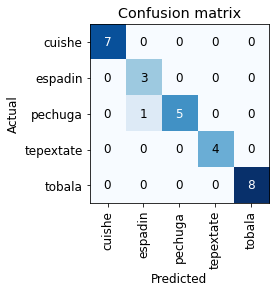

In [6]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

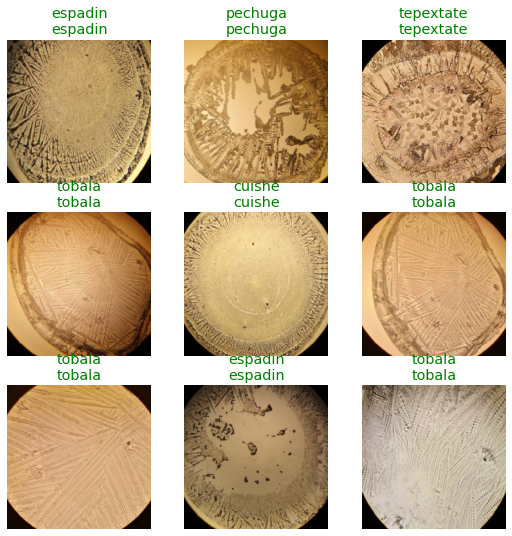

In [7]:
learn.show_results()

In [8]:
# Because we trained in fp16
learn.to_fp32()

In [10]:
learn.export("../models/v3.pkl")